# Exercise 1.1 

## Import Libraries
Python requires importing libraries and functions you need to access specific tools like science (scipy), linear algebra (numpy), and graphics (matplotlib). These libraries can be installed using the ```pip``` command line tool. Alternatively you can install an python distribution like [Anaconda](https://www.continuum.io/downloads) or [Canopy](https://www.enthought.com/products/canopy/)  which have these and many other standard package pre-installed.

In [2]:
import matplotlib.pyplot as plt # plotting
from skimage.io import imread # read in images
import numpy as np # linear algebra / matrices
# make the notebook interactive
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets #add new widgets
from IPython.display import display
class idict(dict):
    def __init__(self,*args,**kwargs) : dict.__init__(self,*args,**kwargs) 
    def __str__(self): return 'ImageDictionary'
    def __repr__(self): return 'ImageDictionary'

## Load Images
Make sure you extract the ```matlab.zip``` file to the same directory as this notebook so there is a ```data/``` directory (or fix the paths after the ```imread``` command

In [3]:
a=imread('data/scroll.tif')
b=imread('data/wood.tif')
c=imread('data/asphalt_gray.tif')

## Showing images

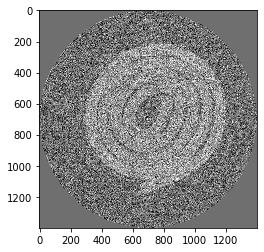

In [4]:
%matplotlib inline
# setup the plotting environment
plt.imshow(a, cmap = 'gray'); # show a single image

### Subplots
Here we show multiple subplots within a single figure

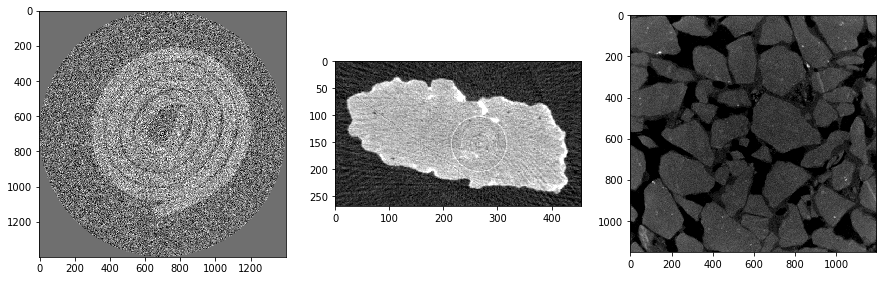

In [5]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(a, cmap = 'gray')
ax2.imshow(b, cmap = 'gray')
ax3.imshow(c, cmap = 'gray')

## Compute SNR
We can compute the SNR by looking at the ratio of the mean to the standard deviation in a region that is supposed to be constant

$$ SNR = \frac{\mu_{img}}{\sigma_{img}} $$

SNR for A_1 is 2.49176960643086


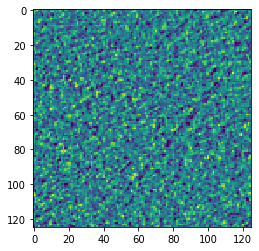

In [6]:
# Identify the region
x1 = 75
x2 = 200
y1 = 875
y2 = 1000

# extract a sub image
subA1=a[x1:x2,y1:y2];
snrA1=np.mean(subA1)/np.std(subA1) # compute the snr
print("SNR for A_1 is {}".format(snrA1))
plt.imshow(subA1)

## __Tasks__
1. Find a second region in a
1. Repeat the procedure with images b and c

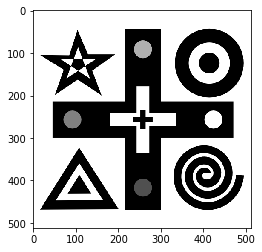

In [7]:
d=np.mean(imread('data/testpattern.png'),2)
plt.imshow(d, cmap= 'gray')

In [8]:
from numpy.random import randn

def show_noisy_images(scale_100, scale_10, scale_5, scale_2, scale_1):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(8.5,5))
    ax1.imshow(d)
    ax1.set_title('Original')

    d_snr100=d+scale_100*randn(*d.shape);
    ax2.imshow(d_snr100)
    ax2.set_title('SNR 100')


    d_snr10=d+scale_10*randn(*d.shape);
    ax3.imshow(d_snr10)
    ax3.set_title('SNR 10')

    scale = 100 
    d_snr5=d+scale_5*randn(*d.shape);
    ax4.imshow(d_snr5)
    ax4.set_title('SNR 5')

    scale = 1000 
    d_snr2=d+scale_2*randn(*d.shape);
    ax5.imshow(d_snr100)
    ax5.set_title('SNR 2')

    scale = 5000 
    d_snr1=d+scale_1*randn(*d.shape);
    ax6.imshow(d_snr1)
    ax6.set_title('SNR 1')
    return idict({1: d_snr1, 2: d_snr2, 5: d_snr5, 10: d_snr10, 100: d_snr100})
noisy_images = interactive(show_noisy_images, scale_100 = (0.0,1.0), scale_10 = (0.0,10.0), scale_5 = (0.0,50.0), scale_2 = (0.0,100.0), scale_1 = (0.0,200.0))
display(noisy_images)

interactive(children=(FloatSlider(value=0.5, description='scale_100', max=1.0), FloatSlider(value=5.0, descrip…

# Filter the images
You can read about the standard filters in scipy by looking at the documentation in http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.filters alternatively more (different) filters are available using OpenCV for the more advanced students

## Uniform Filters
The specific documentation on the filter is as below
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.uniform_filter.html#scipy.ndimage.filters.uniform_filter


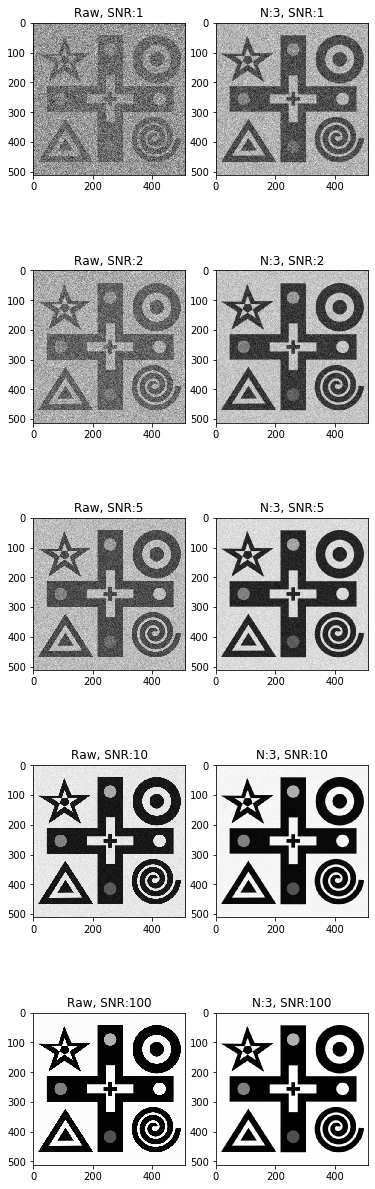

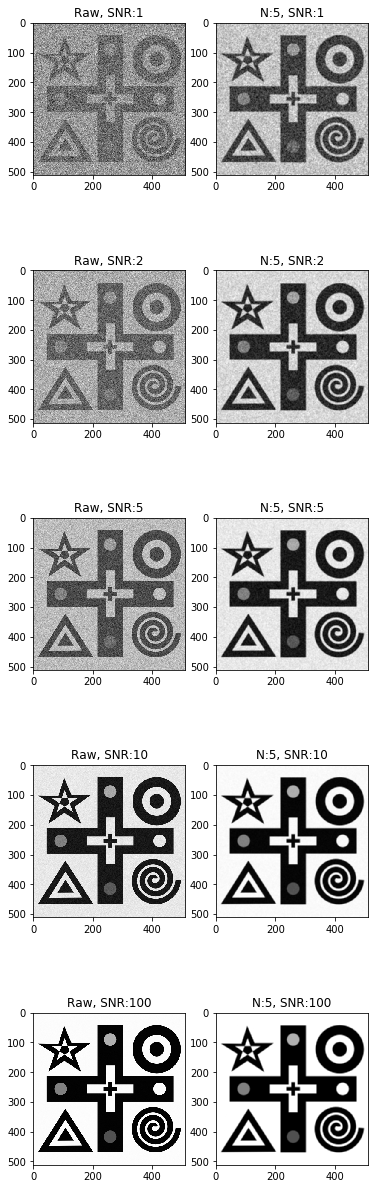

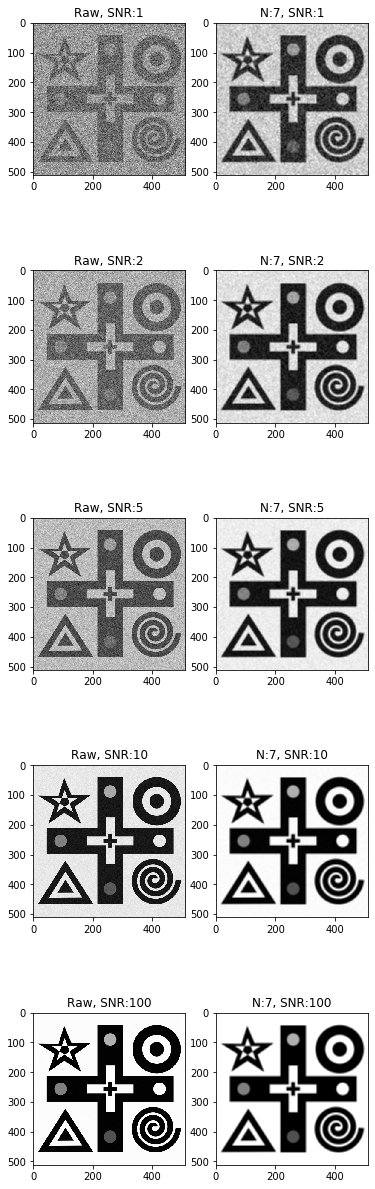

In [9]:
from scipy.ndimage.filters import uniform_filter
# Size of the filter window
N=[3,5,7];
# Images
noisy_image_list = noisy_images.result
for i,filter_size in enumerate(N):
    fig, all_axes = plt.subplots(5, 2, figsize=(6,22))
    for ((snr,img),(ax1,ax2)) in zip(noisy_image_list.items(),all_axes):
        ax1.imshow(img, cmap='gray')
        ax1.set_title("Raw, SNR:{}".format(snr))
        ax2.imshow(uniform_filter(img,filter_size), cmap='gray')
        ax2.set_title("N:{}, SNR:{}".format(filter_size,snr))

## Median Filter
The median filter function can be found here, complete the same exercise as before using this instead
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.median_filter.html#scipy.ndimage.filters.median_filter

In [10]:
# insert your code here

The rest of the exercise as Matlab code, look at the functions in scipy and skimage to finish the execises
## Exercise 3.1 - Wavelet filtering

- Select different number of levels and wavelet types (eg coif, sym, db) wname = 'sym6'; lev =2;
- Select different noise images or even experiment images [c,s] = wavedec2(d_snr10,lev,wname);
- Estimate the noise standard deviation from the % detail coefficients at level 1. det1 = detcoef2('compact',c,s,1); sigma = median(abs(det1))/0.6745;
- Use wbmpen for selecting global threshold
- for image de-noising. alpha = 1.2; thr = wbmpen(c,1,sigma,alpha);
- Use wdencmp for de-noising the image using the above % thresholds with soft thresholding and approximation kept. keepapp = 1; % Select threshold

## Exercise 3.2 - Diffusion filter
Tune the filter parameters for the three experiment images 

In [34]:
def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0.0,option=1,ploton=False):
    """
    Anisotropic diffusion.

    Usage:
    imgout = anisodiff(im, niter, kappa, gamma, option)

    Arguments:
            img    - input image
            niter  - number of iterations
            kappa  - conduction coefficient 20-100 ?
            gamma  - max value of .25 for stability
            step   - tuple, the distance between adjacent pixels in (y,x)
            option - 1 Perona Malik diffusion equation No 1
                     2 Perona Malik diffusion equation No 2
            ploton - if True, the image will be plotted on every iteration

    Returns:
            imgout   - diffused image.

    kappa controls conduction as a function of gradient.  If kappa is low
    small intensity gradients are able to block conduction and hence diffusion
    across step edges.  A large value reduces the influence of intensity
    gradients on conduction.

    gamma controls speed of diffusion (you usually want it at a maximum of
    0.25)

    step is used to scale the gradients in case the spacing between adjacent
    pixels differs in the x and y axes

    Diffusion equation 1 favours high contrast edges over low contrast ones.
    Diffusion equation 2 favours wide regions over smaller ones.

    Reference: 
    P. Perona and J. Malik. 
    Scale-space and edge detection using ansotropic diffusion.
    IEEE Transactions on Pattern Analysis and Machine Intelligence, 
    12(7):629-639, July 1990.

    Original MATLAB code by Peter Kovesi  
    School of Computer Science & Software Engineering
    The University of Western Australia
    pk @ csse uwa edu au
    <http://www.csse.uwa.edu.au>

    Translated to Python and optimised by Alistair Muldal
    Department of Pharmacology
    University of Oxford
    <alistair.muldal@pharm.ox.ac.uk>

    June 2000  original version.       
    March 2002 corrected diffusion eqn No 2.
    July 2012 translated to Python

    February 2020 Revised for Python 3.6 / A. Kaestner
    """

    # ...you could always diffuse each color channel independently if you
    # really want
    if img.ndim == 3:
        warnings.warn("Only grayscale images allowed, converting to 2D matrix")
        img = img.mean(2)

    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    # create the plot figure, if requested
    if ploton:
        import matplotlib.pyplot as plt
        from time import sleep

        plt.figure(figsize=(20,5.5),num="Anisotropic diffusion")
        plt.subplot(1,3,1)
        plt.imshow(img,interpolation='nearest')
        plt.title('Original')
        plt.colorbar()

        
    for ii in np.arange(0,niter):
        smoothimgout = imgout
        
        if sigma != 0 :
            smoothimgout = imgout         ###### Introduce gradient smoothing here 
            
        # calculate the diffs
        deltaS[:-1,: ] = np.diff(smoothimgout,axis=0)
        deltaE[: ,:-1] = np.diff(smoothimgout,axis=1)
        

        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gS = np.exp(-(deltaS/kappa)**2.)/step[0]
            gE = np.exp(-(deltaE/kappa)**2.)/step[1]
        elif option == 2:
            gS = 1./(1.+(deltaS/kappa)**2.)/step[0]
            gE = 1./(1.+(deltaE/kappa)**2.)/step[1]

        # update matrices
        E = gE*deltaE
        S = gS*deltaS

        # subtract a copy that has been shifted 'North/West' by one
        # pixel. don't as questions. just do it. trust me.
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)

    if ploton:
        iterstring = "Iteration %i" %(ii+1)
        plt.subplot(1,3,2)
        plt.imshow(imgout)
        plt.title(iterstring)
        
        plt.subplot(1,3,3)
        plt.imshow(img-imgout)
        plt.title('Difference before - after')


    return imgout

### Part 3.2.1 
In this exercise you need to find the parameters to suppress the noise in the image. __Hint:__ compute the histogram of the gradient image, this will guide you. A very important parameter is $\kappa$ that acts a sensitivity threshold on the gradient contribution. The solution time  i.e. $niter \times step$ also plays a role in the filter strength. 

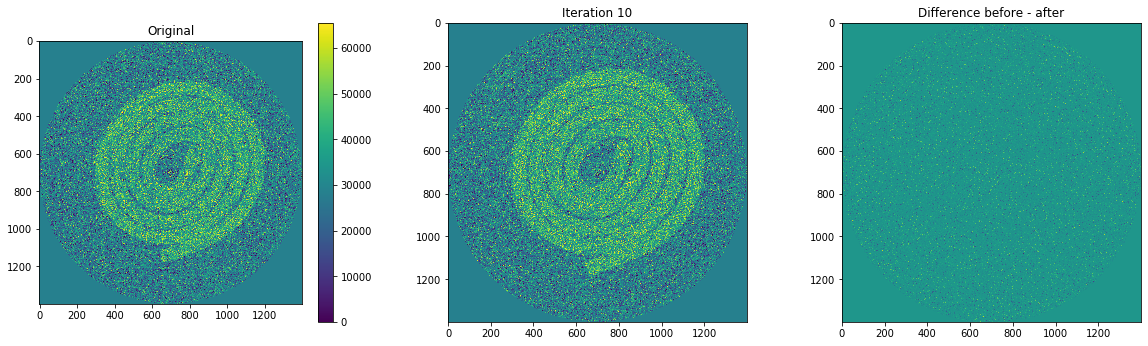

In [35]:
niter=10 
kappa=50  
gamma=0.1 
step=(0.25, 0.25) 
option=2  # select weighing equation
ploton=True
res=anisodiff(img=a, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option,ploton=ploton)

### Part 3.2.2 Introduce some regularization (more advanced)
The original Perona Malik filter is very sensitive to noise. A way improve this is to smooth the image before computing the gradient. 

- Locate the line ```###### Introduce gradient smoothing here``` in the filter function and add a line to filter the image that is used to compute the gradient using a Gauss filter.
- Use filtered image for the gradient but keep ```imgout``` to update the filter iteration.
- Add a parameter ```sigma``` to the function definition to control the width of the Gauss kernel.
- Compare the preformance

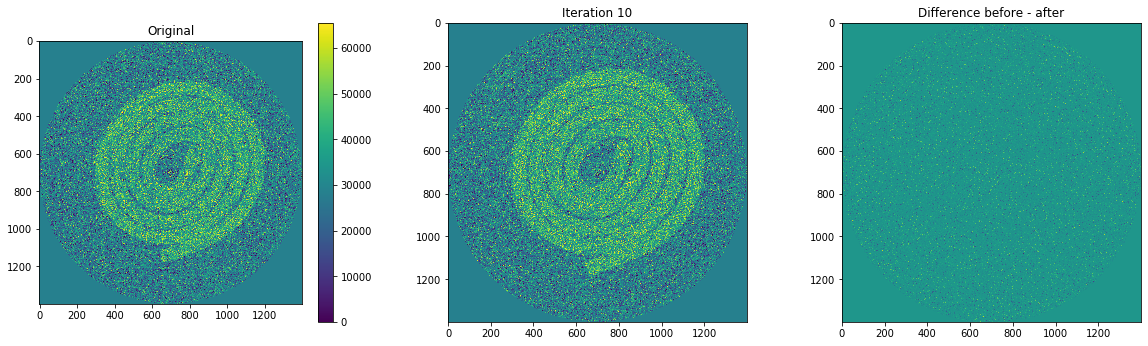

In [36]:
niter=10 
kappa=50  
gamma=0.1 
sigma=1.0
step=(0.25, 0.25) 
option=2  # select weighing equation
ploton=True
res=anisodiff(img=a, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option,sigma=sigma,ploton=ploton)